# Clustering 
---

The purpose of this notebook is to explore potential groupings within the headphone data I scraped from Amazon by using clustering. In this notebook, I use the following clustering algorithms: 

1. K-Means 
2. DBSCAN
3. Gaussain Mixture Model

I will also evaluate the performance of each clustering method to identify the most effective grouping of headphones.


## Set Up
---


In [216]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


## Data Loading
----

In [217]:
df = pd.read_csv('../../data/eda_data.csv', index_col = 0)

In [218]:
df.head()

,Product ID,Description,Rating,Is Prime,Wireless,Noise Cancelling,Battery Life,Microphone,Over Ear,Gaming,...,Colour_Not Specified,Colour_Other,Colour_black,Colour_blue,Colour_gold,Colour_green,Colour_pink,Colour_purple,Colour_red,Colour_white
0,B08HDBZNZ9,"infurture active noise cancelling headphones, ...",4.3,1,1,1,40,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B074DZ39QJ,lindy nc-60 wired active noise cancelling (anc...,4.3,1,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B00I3LUYNG,sony mdrzx310l.ae foldable headphones - metall...,4.5,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B00NBR70DO,"sony mdr-zx110 overhead headphones - black , b...",4.5,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B083P1HG9S,lorelei x6 over-ear headphones with microphone...,4.4,0,0,0,0,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
df.columns

Index(['Product ID', 'Description', 'Rating', 'Is Prime', 'Wireless',
       'Noise Cancelling', 'Battery Life', 'Microphone', 'Over Ear', 'Gaming',
       'Foldable', 'price_trans', 'Colour_Not Specified', 'Colour_Other',
       'Colour_black', 'Colour_blue', 'Colour_gold', 'Colour_green',
       'Colour_pink', 'Colour_purple', 'Colour_red', 'Colour_white'],
      dtype='object')

## K-Means
----

### 1. Define X

In [220]:
# To include all features but Product ID and Description
X = df.drop(columns=['Product ID', 'Description'])

----
**Comment:** 

- **Product ID** is unique to each headphone in the dataset and so does not help in the clustering process we only want to cluster based on features of headphones.
- **Product Description** is raw text data, I have extracted as much as possible from it using regular expressions.

### 2. Scale the Data

In [221]:
# Scale the data since K-Means uses distance in algorithm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [222]:
X_scaled.shape

(478, 20)

### 3. Use PCA to reduce dimensionality of data

Using PCA to reduce dimenstionality of data before clustering in hopes to get more defined clusters.

In [223]:
pca = PCA()
X_pca = pca.fit(X_scaled)

In [224]:
expl_var  = X_pca.explained_variance_ratio_

In [225]:
cum_sum = np.cumsum(expl_var)

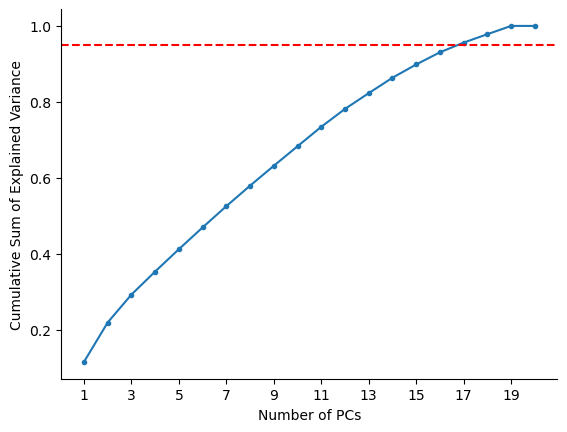

In [227]:
# Finding optimum n_components using cumulative sum 
plt.figure()
plt.plot(range(1,21), cum_sum, marker='.')
plt.axhline(0.95, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1,21,2))
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False) 
plt.show()

----
**Comment:**

When plotting the cumulative sum of explained variance, there was no clear plateau in the scree plot. 

This suggests that each principal component explains a similar amount of variance. This could be due to the size of scraped dataset, which has only 487 rows and 20 features.

To perform PCA again using n_compoenents = 0.95.

In [228]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

### 4. Implement K_means Algorithm

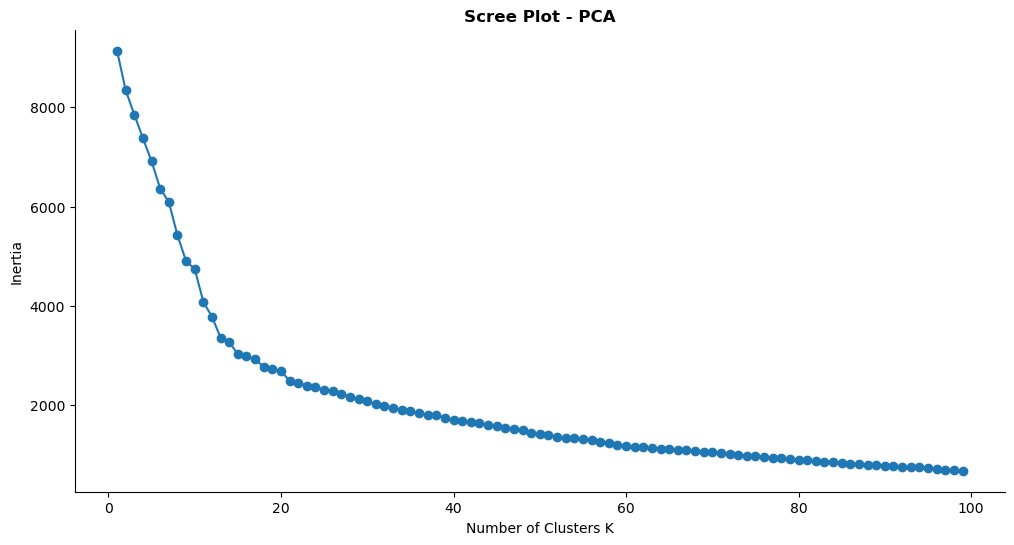

In [229]:
# Determine optimal K using scree plot

inertia_list = []

for k in range(1, 100):
    k_means = KMeans(n_clusters=k, n_init='auto' ,random_state=1)
    # use X_pca 
    k_means.fit(X_pca)
    inertia_list.append(k_means.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 100), inertia_list ,marker="o")
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Scree Plot - PCA', fontweight = 'bold')
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)  
plt.show()

----
**Comment:**

There is no clear 'elbow' in the scree plot, this suggests that the optimal number of k is not clear. Meaning there is an unclear clusters in the datasets and k-means is struggling to find clear distinct clusters. 

Perhaps worth trying to cluster on the scaled data without PCA.

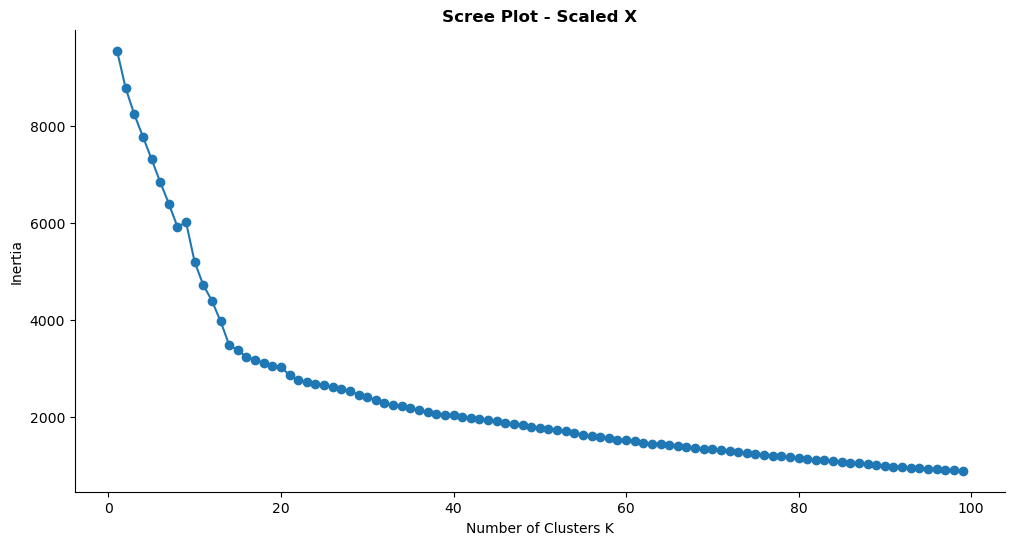

In [230]:
# Determine optimal K using scree plot

inertia_list = []

for k in range(1, 100):
    k_means = KMeans(n_clusters=k, n_init='auto' ,random_state=1)
    # use X_pca 
    k_means.fit(X_scaled)
    inertia_list.append(k_means.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 100), inertia_list ,marker="o")
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Scree Plot - Scaled X', fontweight = 'bold')
ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)  
plt.show()

----
**Comment:**

The scree plot remains unclear when using the scaled data (without PCA), suggesting that the data does not contain well-separated groups. This could due to the dataset having 20 features with less than 500 rows - the dataset might be too wide for effective clustering.

In my data cleaning process, I aimed to keep the dataset as authentic as possible. However, perhaps I did not fully consider the consequences of dropping rows with null ratings. This significant drop in data may have impacted the clustering potential of the data.

Moving forward, I will explore other clustering methods. However, I will also proceed with K-Means, setting k to 15.

### 5. Run K_means with optimal K

#### Without PCA

In [231]:
k_means_final = KMeans(n_clusters=15, n_init='auto', random_state= 1)
k_means_final.fit(X_scaled)

KMeans(n_clusters=15, random_state=1)

In [232]:
silhouette_score(X_scaled, k_means_final.labels_)

0.2614391707466263

#### With PCA

In [233]:
k_means_pca_final = KMeans(n_clusters=15, n_init='auto', random_state= 1)
k_means_pca_final.fit(X_pca)

KMeans(n_clusters=15, random_state=1)

In [234]:
silhouette_score(X_pca, k_means_pca_final.labels_)


0.2975599372514513

----
**Comment:**

Slight increase in silhouette score by using PCA, this could be as PCA reduced some of the noise in the dataset.

Scores for both are relatively low and close to 0. This suggests that k-means clustering was not effective and potentially clustering as whole may not perform well with the scraped data I have.

This may be due to small data size, there may not be enough data to clearly distinguish groups or identify patterns.


## DBSCAN
---

Attempting clustering with DBSCAN, K-means assumes all clusters are spherical. DBSCAN is able to idenitfy clusters that are non-spherical and may perform better with this dataset.

### 1. Define X

To cOntinue using `X_pca` as X value.

### 2. Run DBSCAN Algorithm

In [235]:
silhouette_scores = []
eps = [0.1, 0.25, 0.5, 0.75, 0.8]
min_samples = [4,5,6,7,8]
n_clusters = []

In [236]:
best_score = -1
# Iterate over eps and min_samples values
for e in eps:
    for m in min_samples:    
        # Instantiate
        dbscan_model = DBSCAN(eps=e, min_samples=m)

        # Fit
        cluster_labels = dbscan_model.fit_predict(X_pca)
        
        # Find non-noise points
        non_noise = cluster_labels[cluster_labels != -1]
        
        # Get silhouette score and number of clusters
        n_cluster = len(np.unique(non_noise))
        
        if n_cluster > 1:
            score = silhouette_score(X_pca, cluster_labels)
            
            if score > best_score:
                best_score = score
                params = {'eps' :e, 'min_samples': m}

print(f' Best parameters: {params}, silhouette score: {score}')

 Best parameters: {'eps': 0.8, 'min_samples': 4}, silhouette score: -0.12615725789186794


----
**Comment:**

A silhouette score of -0.1262 suggests that the clustering performance of the DBSCAN model is rather poor. It means that on average, points in the clusters are closer to points in other clusters than they are to points in their own clusters.

This result reinforces the idea that the clustering may not be capturing meaningful groupings within the data. 

## Gaussian Mixture Model
---

In [237]:
from sklearn.mixture import GaussianMixture

silhouette_scores = []
n_clusters_range = range(2, 11) # starting clusters from 2 or er/

for n  in n_clusters_range:
    gmm = GaussianMixture(n_components=n , random_state=1)
    labels = gmm.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, labels))

best_score = np.max(silhouette_scores)
best_n = n_clusters_range[np.argmax(silhouette_scores)]

print(f'{best_n} clusters gets highest silhouette score of {best_score}')


9 clusters gets highest silhouette score of 0.22600859928934838


----
**Comment:**

Again, a silhouette score of 0.226 suggests that while there is some degree of separation between the clusters, the clusters are not very distinct. 

I have decided to stop the clustering attempts at GMM and not proceed with Hierarchial Clustering as the results between each method have not shown much if any improvement.


## Clustering Insights
----

There has been no significant improvement in the silhouette score across the different clustering techniques attempted. This has raised concerns about the data itself and my decision to drop the 599 rows with null ratings.I still think that, in this context, it was better to drop these rows rather than impute values for over half of the dataset. My main concern was about introducing bias and compromising the authenticity of the data.

While I have no doubt that this decision may have implications for my recommender system, I also feel that imputing values could similarly affect its performance. Ultimately, both approaches have their trade-offs, and I will need to evaluate the impact of my choices as I move forward with the development of the content-based recommender system.

## Conclusion
----

The purpose of clustering was to identify any potential groupings within the data and reveal underlying patterns. The clustering results in this notebook were not great, which initially raised concerns about building a recommender system. However, even if the clustering results were poor, it does not necessarily imply that the recommender system will perform poorly.

Moving forward, my focus will be on building a content-based recommender and possibly extending the approach to include some collaborative filtering techniques if viable.

